<a href="https://colab.research.google.com/github/sexymonster/Class/blob/main/CNN_0908.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.8.0'

In [3]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(type(train_input))
print(train_input.shape)
print(train_target.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)


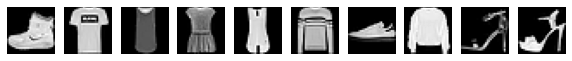

In [5]:
fig, axis = plt.subplots(1, 10, figsize = (10,10))

for i in range(10):
  axis[i].imshow(train_input[i], cmap = "gray")
  axis[i].axis("off")
plt.show()

In [6]:
print(np.unique(train_target))
print(train_target[:9])

[0 1 2 3 4 5 6 7 8 9]
[9 0 0 3 0 2 7 2 5]


더미 차원 1을 추가\
255로 나눠 주면서 scale 적용

In [7]:
train_input = train_input.reshape(-1,28,28,1)/255.
test_input = test_input.reshape(-1,28,28,1)/255.

print(train_input.shape, test_input.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


모델에 2차원 컨볼루션 레이어 추가\
모델에 max pooling 으로 차원 축소

In [8]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size=3,
                              activation = "relu", padding = "same",# padding:사이즈가 줄어드는거 방지
                              strides =1, input_shape = (28,28,1))) # strides:커널이 몇칸씩 넘기는지 

model.add(keras.layers.MaxPool2D(pool_size = 2))

keras.layers.Conv2D
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(keras.layers.Conv2D(filters = 64, kernel_size=3,
                              activation = "relu", padding = "same",
                              strides =1))
model.add(keras.layers.MaxPool2D(pool_size = 2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [11]:
!pip install graphviz
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


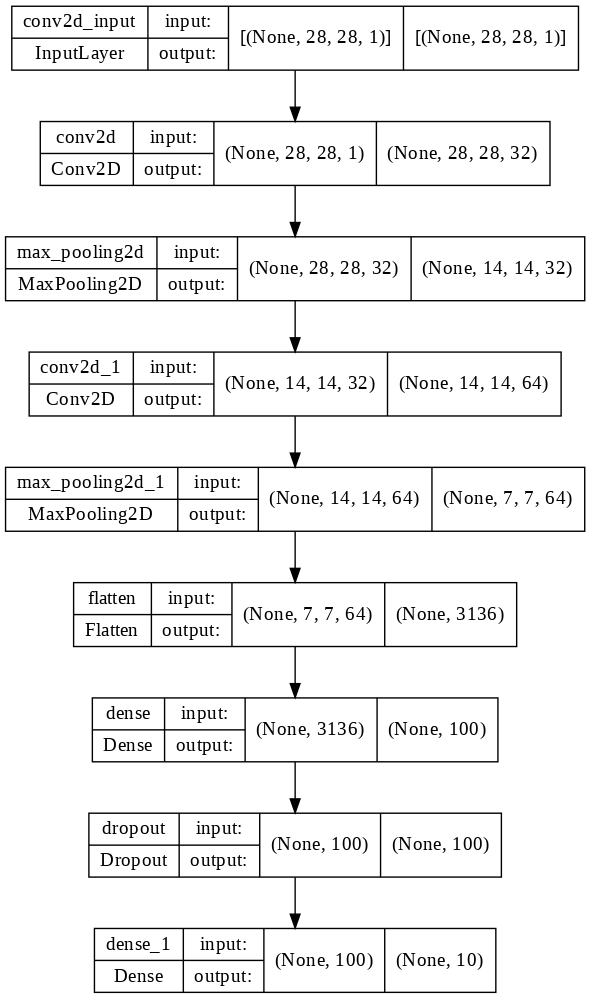

In [12]:
keras.utils.plot_model(model, show_shapes=True,
                      to_file = 'cnn.png', dpi = 100)

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy', optimizer='adam') # categorical_crossentropy 원 핫 인코딩 필요

checkpoint = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(train_input, train_target, epochs= 30,
                   validation_split=0.3, callbacks=[checkpoint, early_stopping])

Epoch 1/30
1313/1313 [==============================] - 20s 5ms/step - loss: 0.5438 - accuracy: 0.8066 - val_loss: 0.3675 - val_accuracy: 0.8638
Epoch 2/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3536 - accuracy: 0.8712 - val_loss: 0.2934 - val_accuracy: 0.8911
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3031 - accuracy: 0.8893 - val_loss: 0.2615 - val_accuracy: 0.9056
Epoch 4/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2683 - accuracy: 0.9036 - val_loss: 0.2619 - val_accuracy: 0.9097
Epoch 5/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2445 - accuracy: 0.9101 - val_loss: 0.2669 - val_accuracy: 0.9043
Epoch 6/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2241 - accuracy: 0.9172 - val_loss: 0.2373 - val_accuracy: 0.9164
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2046 - accuracy: 0.9237 - val_loss: 0.2346 - val_accuracy

In [14]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2516 - accuracy: 0.9122


[0.2515999376773834, 0.9121999740600586]

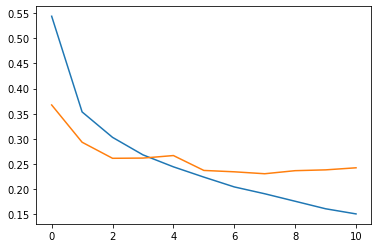

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])